In [160]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from datetime import datetime
import numpy as np

In [3]:
%matplotlib inline

In [149]:
ante_natal_care_df = pd.read_csv("csv/HealthData-Nilgiris-AnteNatal-2014-2015.csv")
family_planning_df = pd.read_csv("csv/HealthData-Nilgiris-FamilyPlanning-2014-2015.csv")

In [150]:
family_planning_df.columns

Index([u'Parameters', u'Type', u'Total Facility', u'April 13-14',
       u'April 14-15', u'Difference-April 14-15-April 13-14',
       u'Total Reported Facility', u'May 13-14', u'May 14-15',
       u'Difference-May 14-15-May 13-14', u'Total Reported Facility.1',
       u'June 13-14', u'June 14-15', u'Difference-June 14-15-June 13-14',
       u'Total Reported Facility.2', u'July 13-14', u'July 14-15',
       u'Difference-July 14-15-July 13-14', u'Total Reported Facility.3',
       u'August 13-14', u'August 14-15',
       u'Difference-August 14-15-August 13-14', u'Total Reported Facility.4',
       u'September 13-14', u'September 14-15',
       u'Difference-September 14-15-September 13-14',
       u'Total Reported Facility.5', u'October 13-14', u'October 14-15',
       u'Difference-October 14-15-October 13-14', u'Total Reported Facility.6',
       u'November 13-14', u'November 14-15',
       u'Difference-November 14-15-November 13-14',
       u'Total Reported Facility.7', u'December 13-1

In [151]:
df = family_planning_df.filter(regex=("Difference"))

In [152]:
family_planning_subset_df = family_planning_df.select(lambda col: not col.startswith('Total') and not col.startswith('Difference') \
                          and not col.startswith('Type'),axis=1 )

In [153]:
months = {'January':'Jan',
          'February':'Feb',
          'March':'Mar',
          'April':'Apr',
          'May':'May',
          'June':'Jun',
          'July':'Jul',
          'August':'Aug',
          'September':'Sep',
          'October':'Oct',
          'November':'Nov',
          'December':'Dec'}


In [10]:
def get_date_from_column_name(name):
    month_present = name.split(" ")
    year = month_present[1].split("-")
    date_string = months[month_present[0]]+" "+year[0]
    return datetime.strptime(date_string,"%b %y")

In [22]:
def from_datetime_get_month_and_year(date):

    return str(date.month)+"-"+str(date.year)

In [88]:
def sort_df_on_time(df):
    columns = {}

    for name in (df.keys()[1:]):
        columns[get_date_from_column_name(name)] = name
    
    dates = columns.keys()
    dates.sort()
    
    new_df = pd.DataFrame()
    new_df[df.columns[0]] = df[df.columns[0]]
    for date in dates:
        column_name = columns[date]
        new_df[from_datetime_get_month_and_year(date)] = df[column_name]
    
    return new_df   

In [188]:
sorted_df = sort_df_on_time(family_planning_subset_df)
sorted_df = sorted_df.fillna(axis=1,method='backfill')


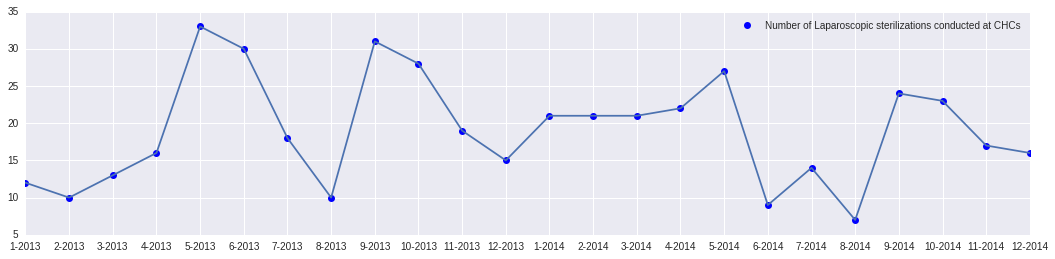

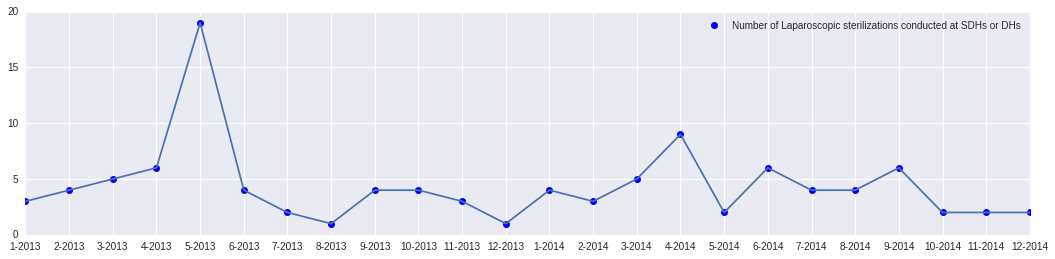

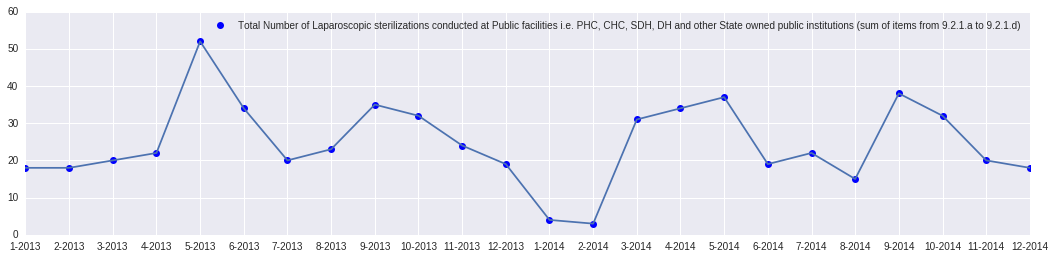

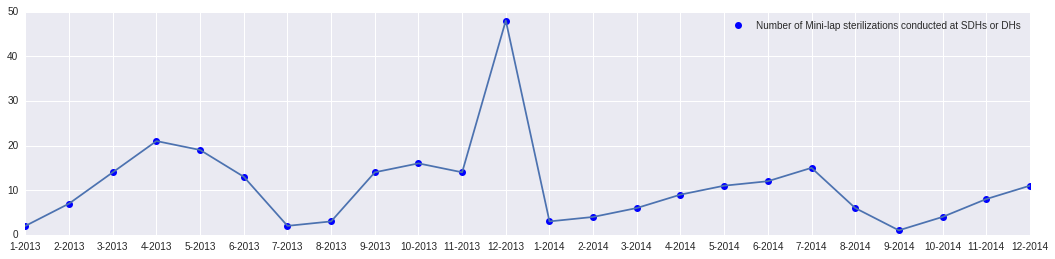

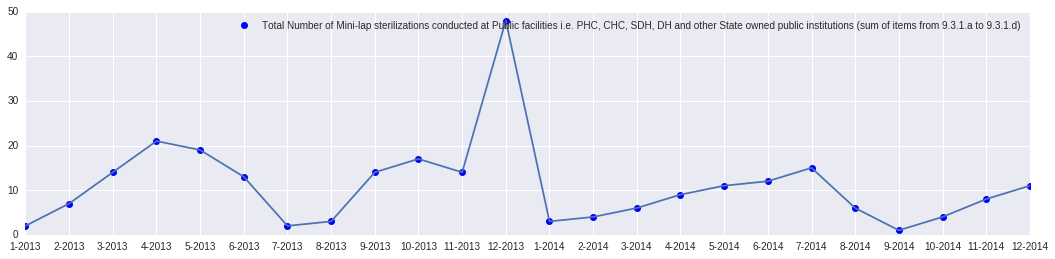

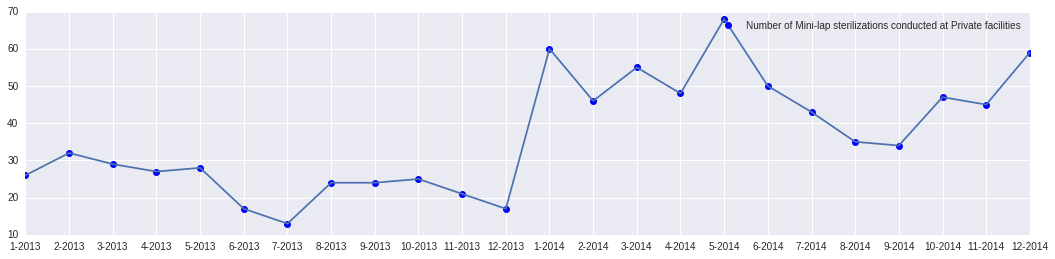

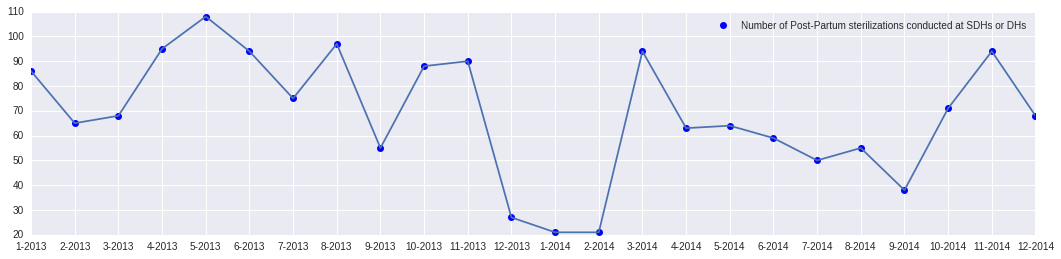

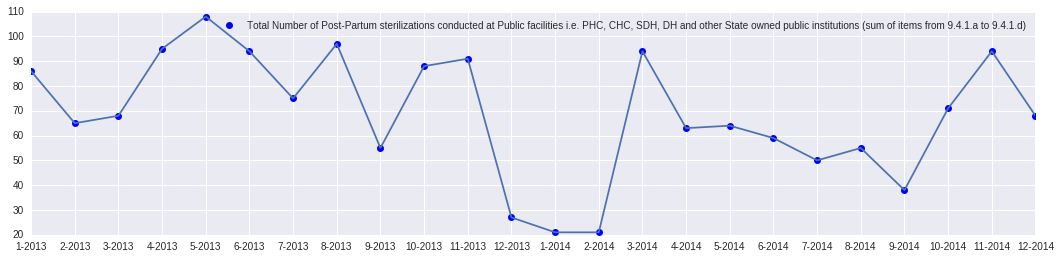

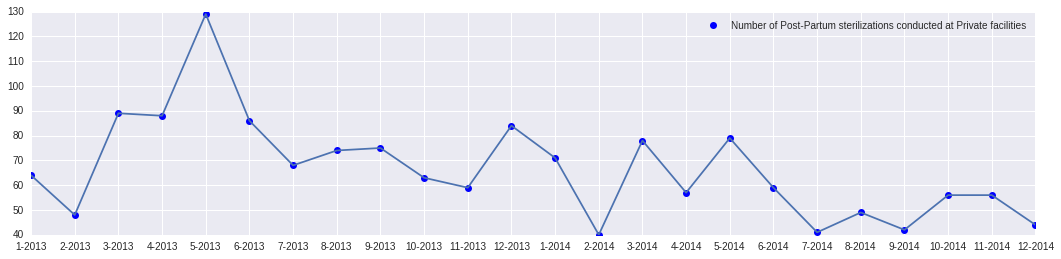

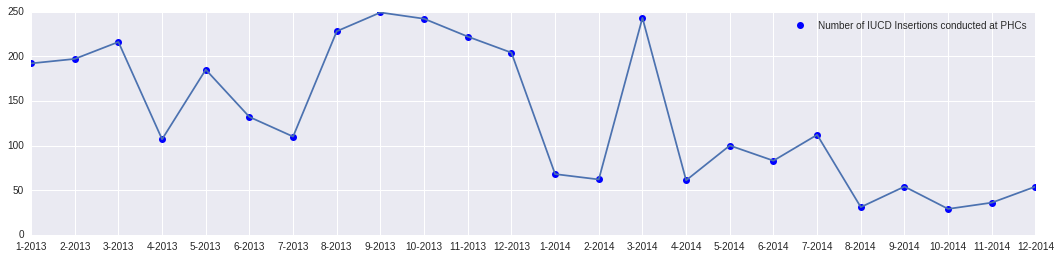

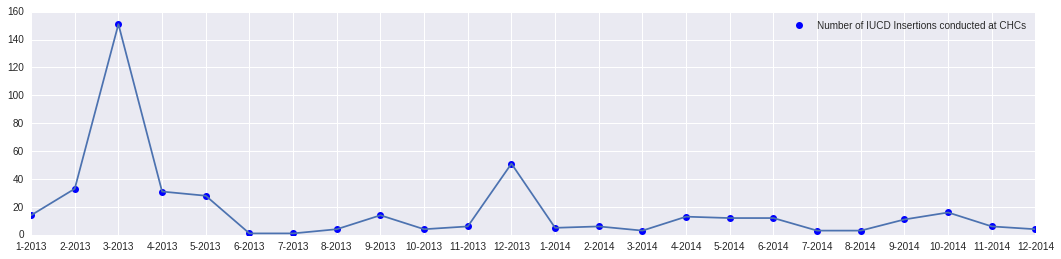

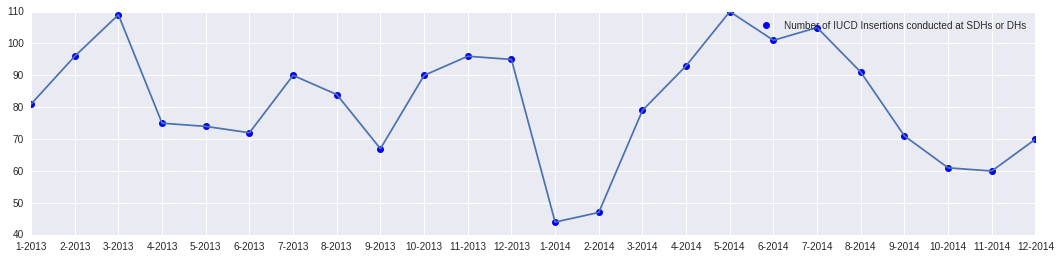

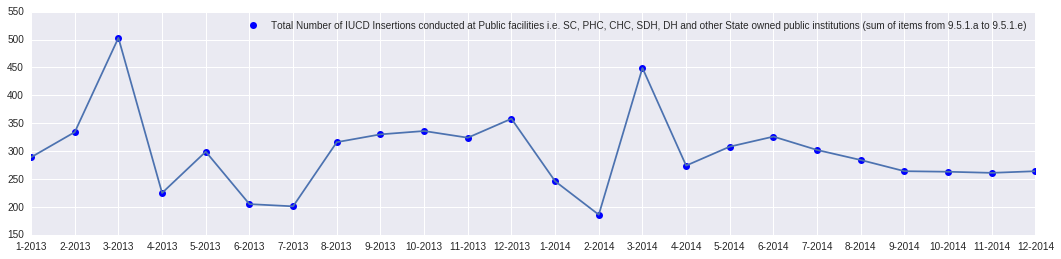

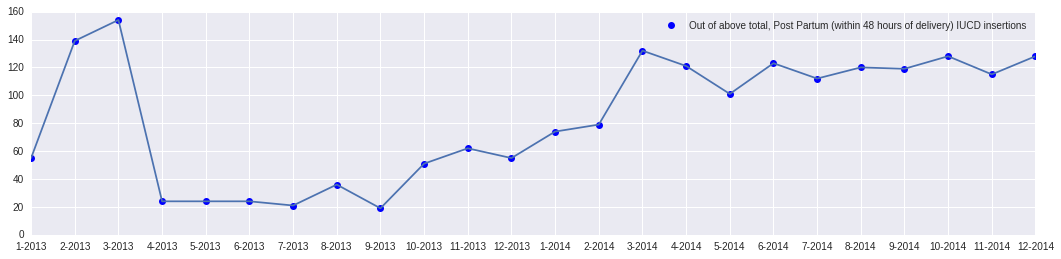

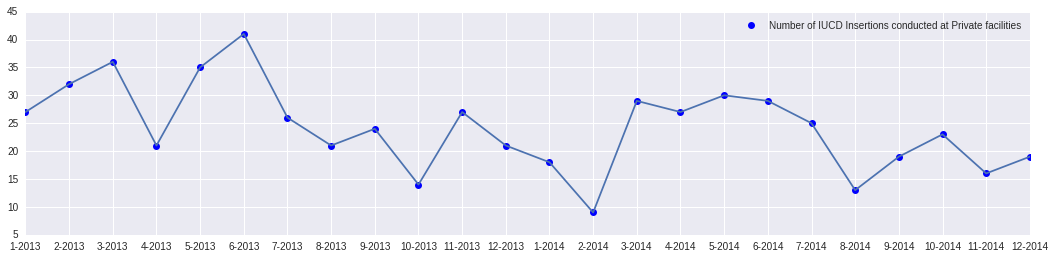

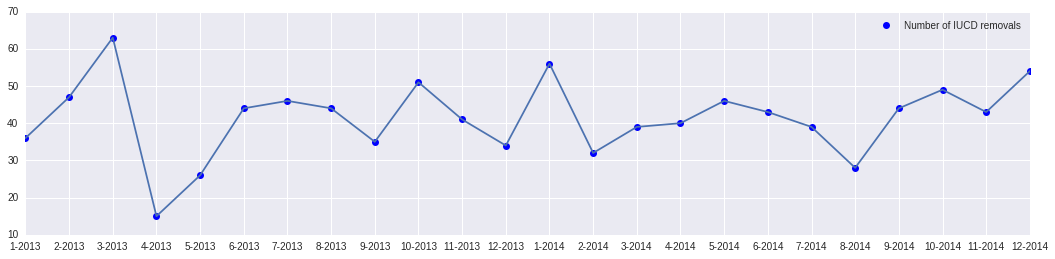

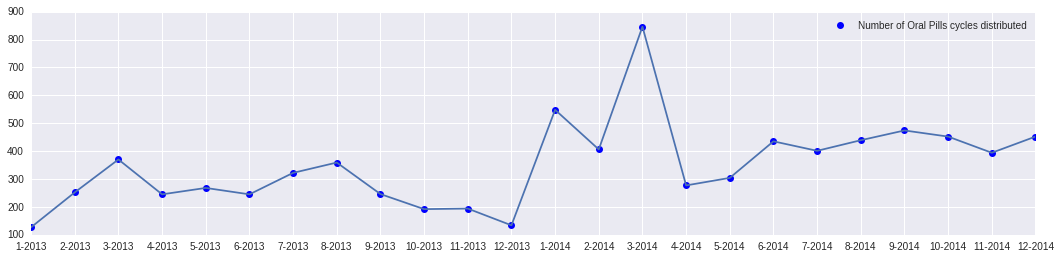

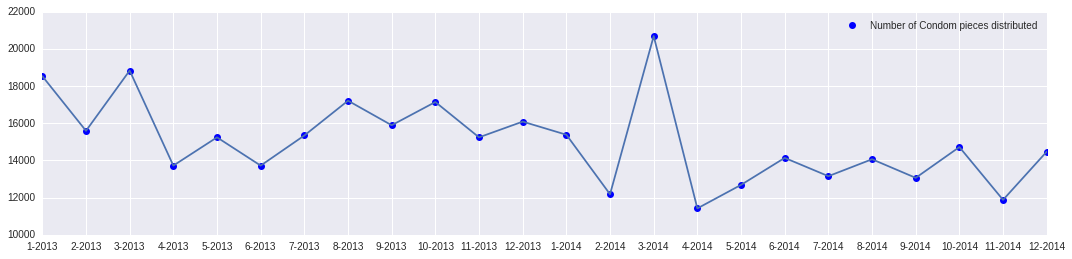

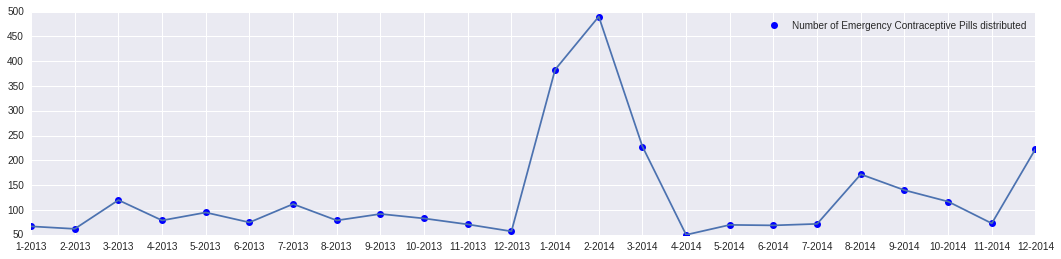

In [189]:
for k,v in sorted_df.iterrows():

    plt.figure(figsize=(18,4))
    plt.xticks(range(0,(len(sorted_df.columns)-1)),v.index[1:])
    plt.plot(v.values[1:],'bo')
    plt.plot(v.values[1:])

    plt.legend([v.values[0]])
    
    